# Input data analysis and distribution fitting

This notebook imports the location data, fits distributions and applies a Kolmogorov–Smirnov (KS) test using the Scipy Stats library. Towards the end of this notebook there is a cell that generates Figure 5 of the manuscript. 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 14})

In [2]:
# Main Data:
'''
NaN/Nulls need to be dropped where input data is incomplete, for example where lava's are not known
'''

df = pd.read_csv("BasaltData.csv")
Igz = df["Total igneous thickness"].dropna()
Well = df["Abbreviation"].dropna()
nlava = df["nLava"].dropna()
grade = df["Grade"].dropna()
IgT = (Igz/nlava).dropna()

# Sample of the data:
df.head(5)

,Borehole,Abbreviation,Longitude,Latitude,X,Y,Total igneous thickness,nLava,Grade,Igneous thickness citation
0,AMan 2,AM2,82.118812,40.140652,595306.26,4443968.32,98.5,NaN,0.10,"""Luo, 2006, Master Desertation Essay"""
1,AMan1,AM1,82.030489,40.383505,587468.93,4470833.59,75.0,NaN,0.08,"""Li et al., 2011, JAES"""
2,BaDong 2,BD2,81.860125,39.241491,574226.46,4343928.11,98.0,NaN,0.09,"""Chen, 2005, Doctor Dersertation Essay"""
3,Damusi,DMS,76.640674,37.747448,115860.43,4186750.41,40.0,NaN,0.02,"""Li et al., 2008"""
4,Ha 5,Ha5,82.811847,41.200496,651919.82,4562596.92,40.0,1.0,0.28,"""Zhang C.L. et al., 2008"""


In [3]:
# Distribution fitting functions
from scipy.stats import kstest

def fitdist(data,dist, bins, xlab):
    params = dist.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, np.max(data), 1000)
    _, ax = plt.subplots(1, 1)
    plt.hist(data, bins = bins, range=(0, np.max(data)),fc='lightgrey', ec='k', label="Data")
    plt.ylabel("Count")
    plt.xlabel(xlab)
    plt.xlim(0, np.max(data))
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2, label="Model")
    ax2.set_xlim(0,np.max(x))
    ax2.set_ylabel("Probability density")
    plt.legend()
    plt.gca().set_ylim(bottom=0)
    plt.show()
    return dist, loc, scale, arg

def fitcdf(data, dist, bins, xlab):
    params = dist.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, np.max(data), 1000)
    _, ax = plt.subplots(1, 1)
    counts, bin_edges = np.histogram(data, bins=bins, normed=True)
    cdf = np.cumsum(counts)
    plt.plot(bin_edges[1:], cdf, label="Data")
    plt.ylabel("Probability density")
    plt.xlabel(xlab)
    plt.xlim(0, np.max(data))
    plt.ylim(0,np.max(cdf))
    ax2 = ax.twinx()
    ycdf = dist.cdf(x, loc=loc, scale=scale, *arg)
    ax2.plot(x, ycdf, '-', color = "r", lw=2, label="Model")
    ax2.set_xlim(0,np.max(x))
    ax2.set_ylim(0,np.max(ycdf))
    ax2.set_ylabel("Normalised CDF")
    plt.legend()
    plt.gca().set_ylim(bottom=0)
    plt.show()
    return dist, loc, scale, arg

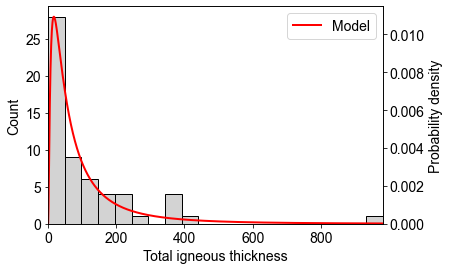

<ipython-input-3-8f220a835203>:31: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(data, bins=bins, normed=True)


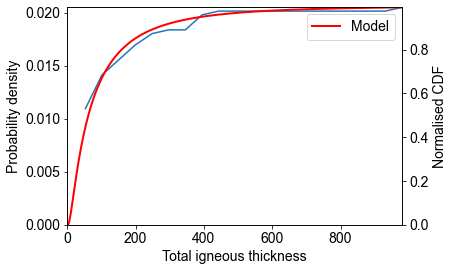

K-S Test P Value =  0.6237311717002717


In [4]:
# Basalt thickness:

data = Igz
dist = st.lognorm
xlab = "Total igneous thickness"
bins= 20

dist, loc, scale, arg  = fitdist(data, dist, bins, xlab)
d, pvalue = kstest(data.tolist(), lambda x: dist.cdf(x, loc = loc, scale = scale, *arg), alternative="two-sided")
cdist, cloc, cscale, carg = fitcdf(data,dist, bins, xlab)

print("K-S Test P Value = ", pvalue)

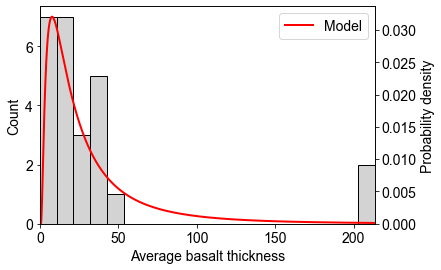

<ipython-input-3-8f220a835203>:31: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(data, bins=bins, normed=True)


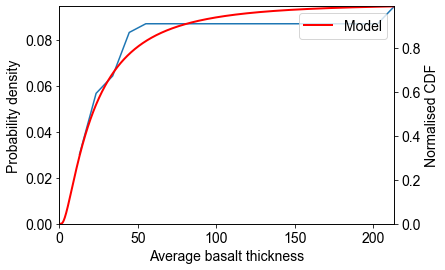

K-S Test P Value =  0.7378433001588454


In [5]:
# Average thickness:

data = IgT
dist = st.lognorm
xlab = "Average basalt thickness"
bins= 20

dist, loc, scale, arg  = fitdist(data, dist, bins, xlab)
d, pvalue = kstest(data.tolist(), lambda x: dist.cdf(x, loc = loc, scale = scale, *arg), alternative="two-sided")
cdist, cloc, cscale, carg = fitcdf(data,dist, bins, xlab)

print("K-S Test P Value = ", pvalue)

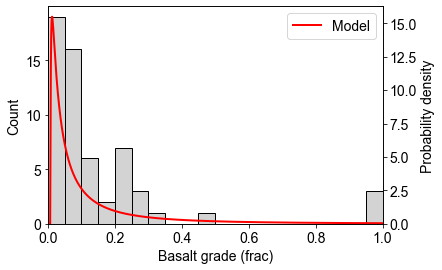

<ipython-input-3-8f220a835203>:31: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(data, bins=bins, normed=True)


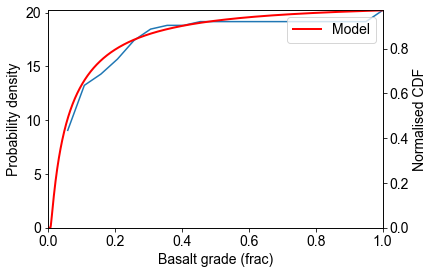

K-S Test P Value =  0.1582392031780797


In [6]:
# Basalt Grade:

data = grade
dist = st.lognorm
xlab = "Basalt grade (frac)"
bins= 20

dist, loc, scale, arg  = fitdist(data, dist, bins, xlab)
d, pvalue = kstest(data.tolist(), lambda x: dist.cdf(x, loc = loc, scale = scale, *arg), alternative="two-sided")
cdist, cloc, cscale, carg = fitcdf(data,dist, bins, xlab)

print("K-S Test P Value = ", pvalue)

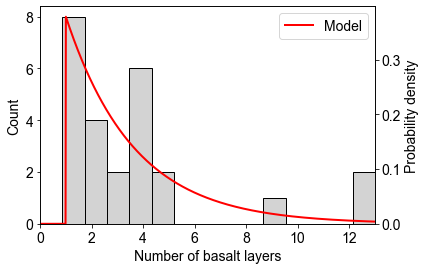

<ipython-input-3-8f220a835203>:31: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(data, bins=bins, normed=True)


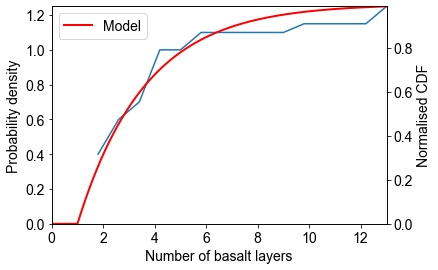

K-S Test P Value =  0.008904481644167905


In [7]:
# Number of Lavas:

data = nlava
dist = st.expon
xlab = "Number of basalt layers"
bins= 15

dist, loc, scale, arg  = fitdist(data, dist, bins, xlab)
d, pvalue = kstest(data.tolist(), lambda x: dist.cdf(x, loc = loc, scale = scale, *arg), alternative="two-sided")
cdist, cloc, cscale, carg = fitcdf(data,dist, bins, xlab)

print("K-S Test P Value = ", pvalue)

### The following cell generates Figure 5 of the manuscript:

(0.0, 1.0)

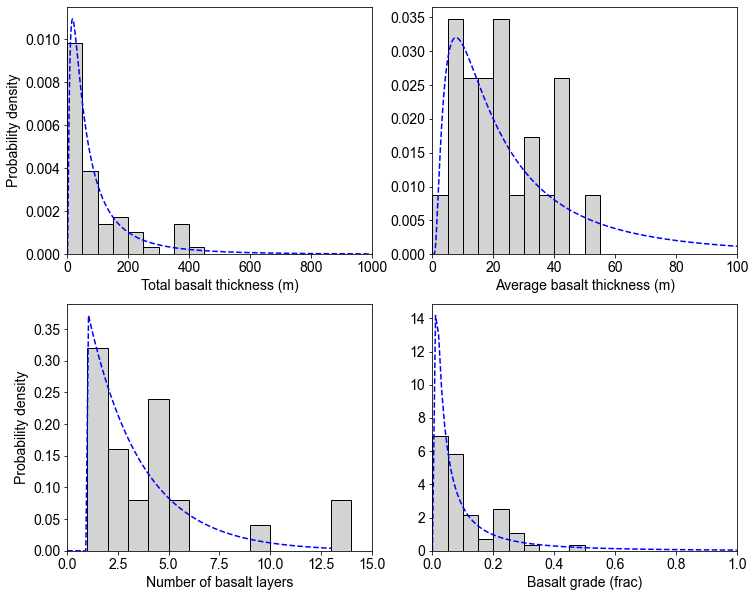

In [8]:
# Figure 5 of manuscript:
# This cell can be run without running the above as it is self contained

shb,lb,scb = st.lognorm.fit(Igz) # total basalt thickness
xb = np.linspace(0,1000, num=1000)
shg,lg,scg = st.lognorm.fit(grade) # grade, lognormal distribution
xg = np.linspace(0,1.0, num=100)
shl,ll = st.expon.fit(nlava) # Number of lavas, exponential distribution
xl = np.linspace(0,np.max(nlava), num=100) 
sht, lt, sct = st.lognorm.fit(IgT) # average lava thickness, lognormal distribution
xt = np.linspace(0,np.max(IgT), num=1000)

# PDF's:
distb = st.lognorm.pdf(xb, shb, lb, scb)
distg = st.lognorm.pdf(xg, shg, lg, scg)
distl = st.expon.pdf(xl, shl, ll)
distt = st.lognorm.pdf(xt, sht, lt, sct)

# construct the plot: 

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(12,10));

# Basalt and average thickness: 
#ax1.hist(Igz, bins=40, ec='k', fc='lightgrey', density=True)
ax1.hist(Igz, bins=np.arange(0,1000,50), ec='k', fc='lightgrey', density=True)
ax1.plot(xb, distb, '--b')
ax1.set_xlabel("Total basalt thickness (m)")
ax1.set_xlim(0,1000)
ax1.set_ylabel("Probability density")
ax2.hist(IgT, bins=np.arange(0,100,5), ec='k', fc='lightgrey', density=True)
ax2.plot(xt, distt, '--b')
ax2.set_xlabel("Average basalt thickness (m)")
ax2.set_xlim(0,100)
# Number of lavas and grade:
ax3.hist(nlava, bins=np.arange(0,15,1), ec='k', fc='lightgrey', density=True)
ax3.plot(xl, distl, '--b')
ax3.set_xlabel("Number of basalt layers")
ax3.set_xlim(0,15)
ax3.set_ylabel("Probability density")
ax4.hist(grade, bins=np.arange(0,1,0.05), ec='k', fc='lightgrey', density=True)
ax4.plot(xg, distg, '--b')
ax4.set_xlabel("Basalt grade (frac)")
ax4.set_xlim(0,1)